In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("Advertising.csv")
data


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<Axes: >

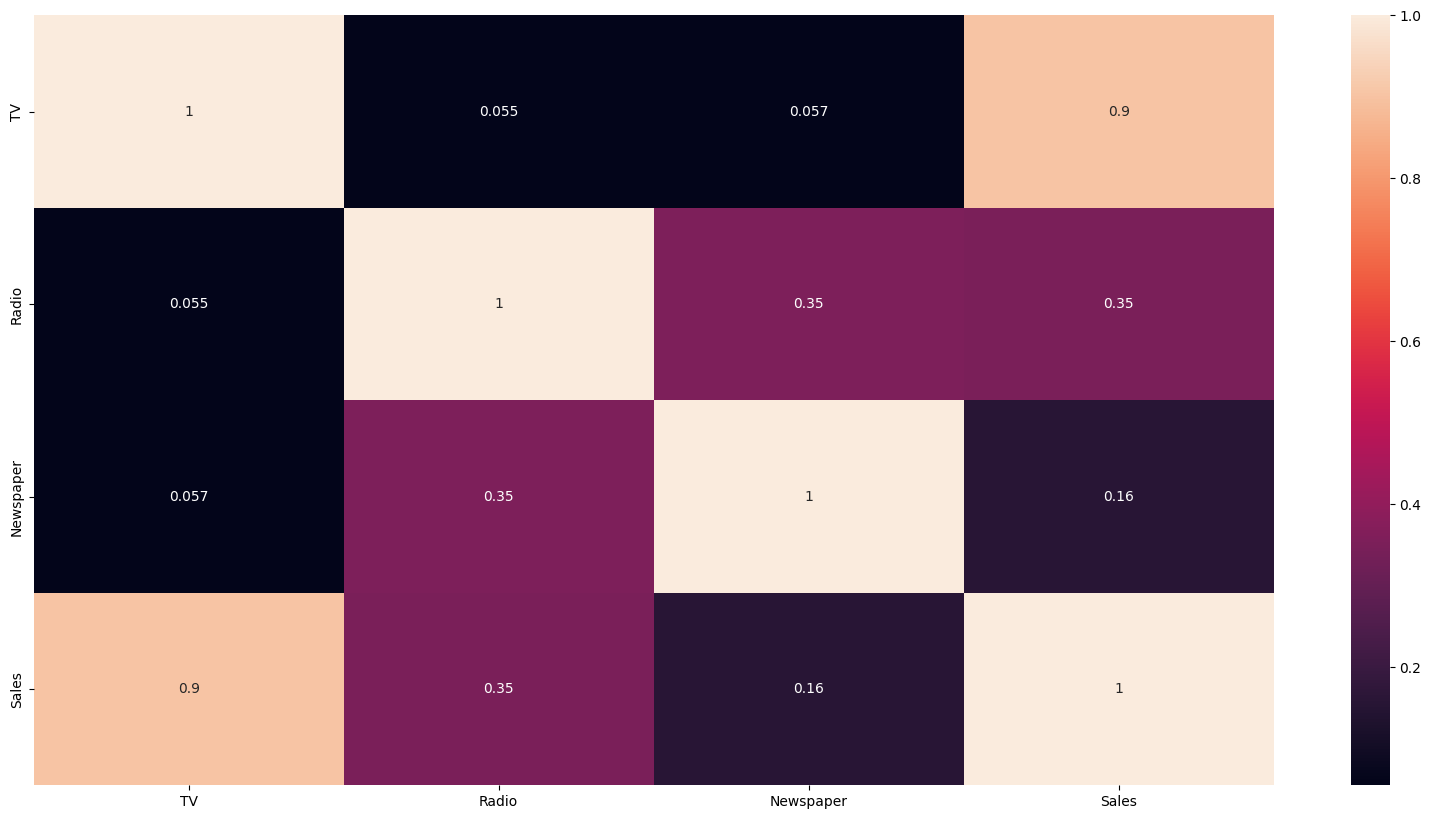

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

## Bài toán con nhỏ nhất
Lstat -> medv

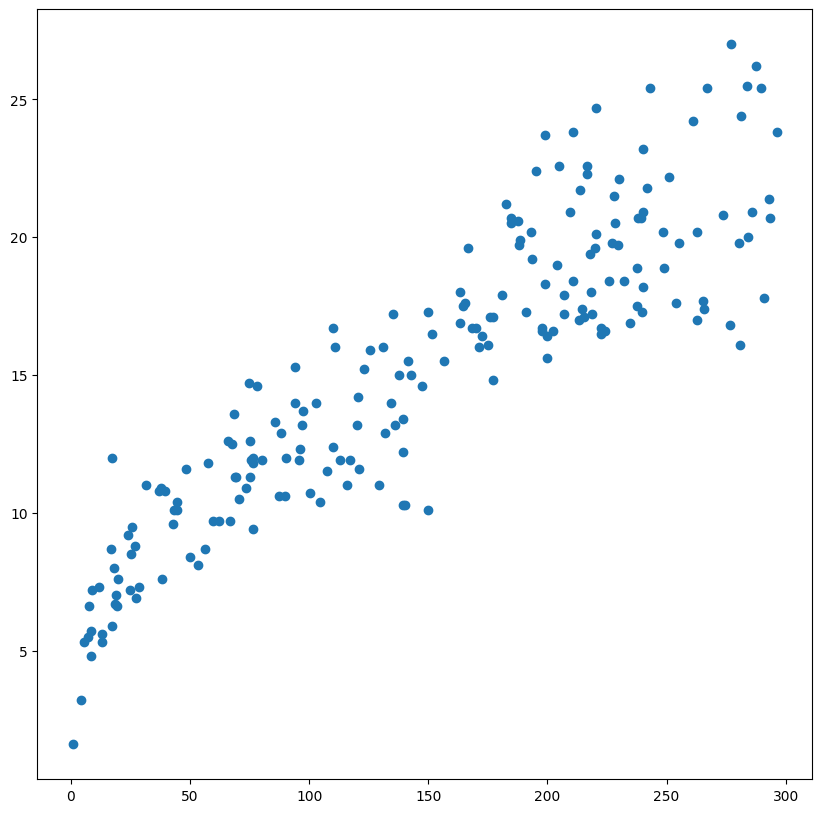

In [ ]:
X = data['TV'].to_numpy().reshape(-1, 1)
Y = data['Sales'].to_numpy().reshape(-1, 1)

plt.figure(figsize=(10,10))
plt.scatter(X, Y)

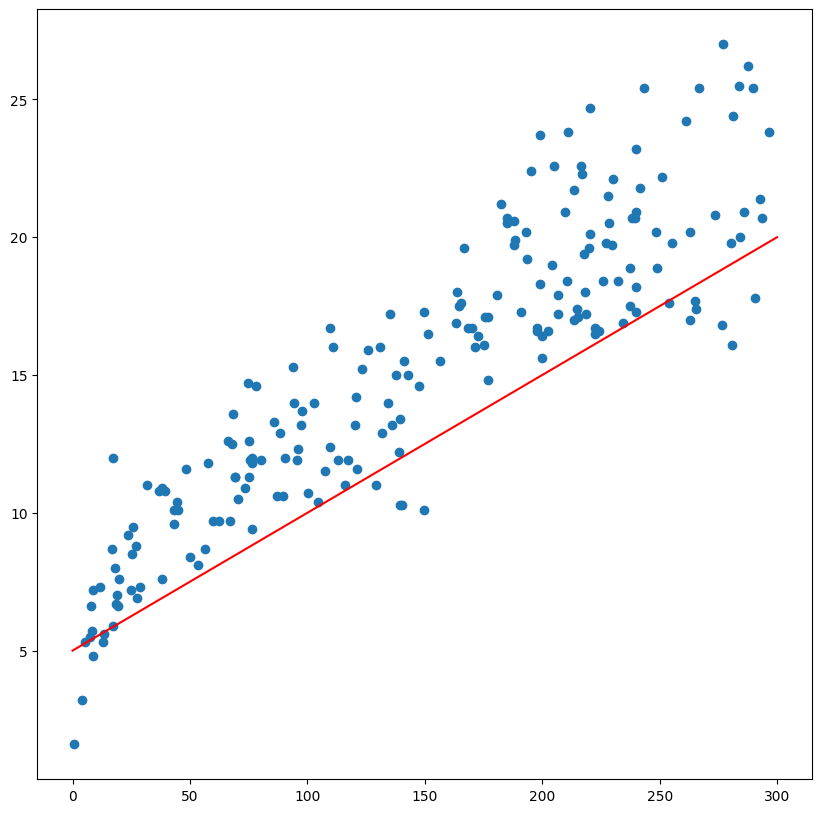

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X, Y)
plt.plot([0,300],[5,20], 'red')

# 1. Bài toán con
Chúng ta sẽ giải quyết bài toán con trước, vẽ đường thẳng predict

In [ ]:
import time
data = np.genfromtxt('Advertising.csv',
                     delimiter=',',
                     skip_header=1)
N = 200
n_epochs = 10000
lr = 0.00001


thetas = np.random.randn(2,).T
losses = []
thetases = []

for epoch in range(n_epochs):
    for i in range(N):
        sample_i = data[i]

        x_1 = sample_i[0]
        y_i = sample_i[3]
        vector_x = np.array([x_1, 1])

        # compute output
        y_hat = vector_x.dot(thetas)

        # compute loss
        loss = (y_hat - y_i)*(y_hat - y_i)

        # compute gradient
        gradients = 2*vector_x.T.dot(y_hat - y_i)

        # cập nhật tham số
        thetas = thetas - lr*gradients
        thetases.append(thetas)

        losses.append(loss)

print(thetas)

[0.04759847 6.92473818]


<ipython-input-148-64583a8f5528>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


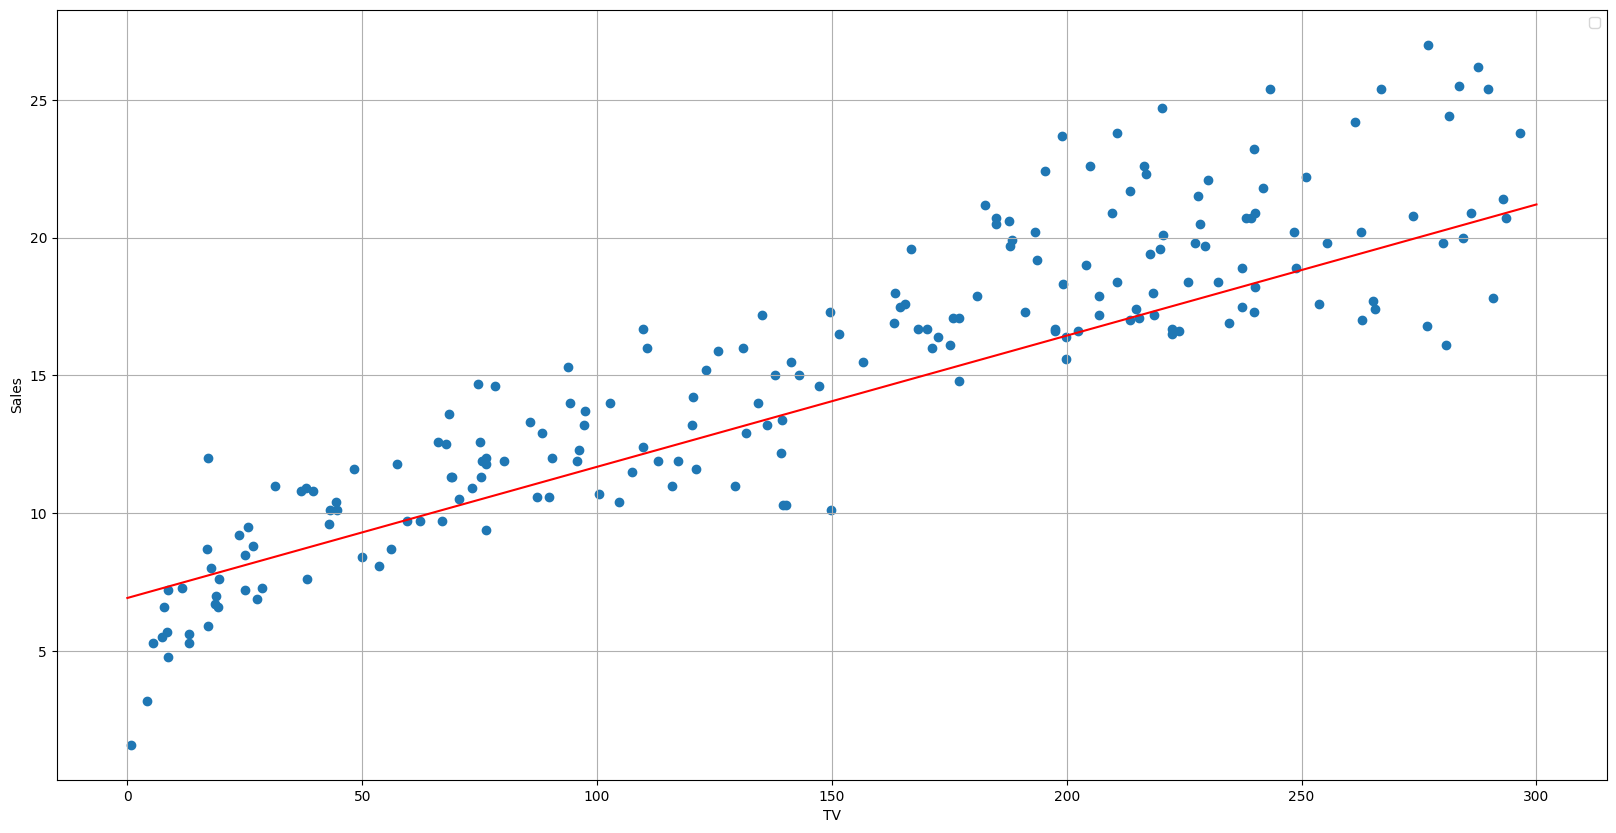

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("Advertising.csv")


X = data['TV'].to_numpy().reshape(-1, 1)
Y = data['Sales'].to_numpy().reshape(-1, 1)


plt.figure(figsize=(20, 10))
plt.scatter(X, Y, )


x_line = np.array([0, 300])
y_line = thetas[0] * x_line + thetas[1]
plt.plot(x_line, y_line, color='red')


plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


# So sánh tương quan
Chúng ta sẽ train với 2 cách là Scochastic và mini-batch để xem về evalute lẫn time

## 1. Scochastic

In [ ]:
import time
data = np.genfromtxt('Advertising.csv',
                     delimiter=',',
                     skip_header=1)
N = 200
n_epochs = 500
lr = 0.00001


thetas = np.random.randn(4,).T
losses = []

t1 = time.time()
for epoch in range(n_epochs):
    for i in range(N):
        sample_i = data[i]

        x_1 = sample_i[0]
        x_2 = sample_i[1]
        x_3 = sample_i[2]
        y_i = sample_i[3]
        vector_x = np.array([x_1, x_2, x_3, 1])

        # compute output
        y_hat = vector_x.dot(thetas)

        # compute loss
        loss = (y_hat - y_i)*(y_hat - y_i)

        # compute gradient
        gradients = 2*vector_x.T.dot(y_hat - y_i)

        # cập nhật tham số
        thetas = thetas - lr*gradients

        losses.append(loss)

t2 = time.time()
print(thetas)

[0.07069295 0.15049625 0.01365784 0.93629278]


Thời gian chạy của thuật toán:  0.805518627166748


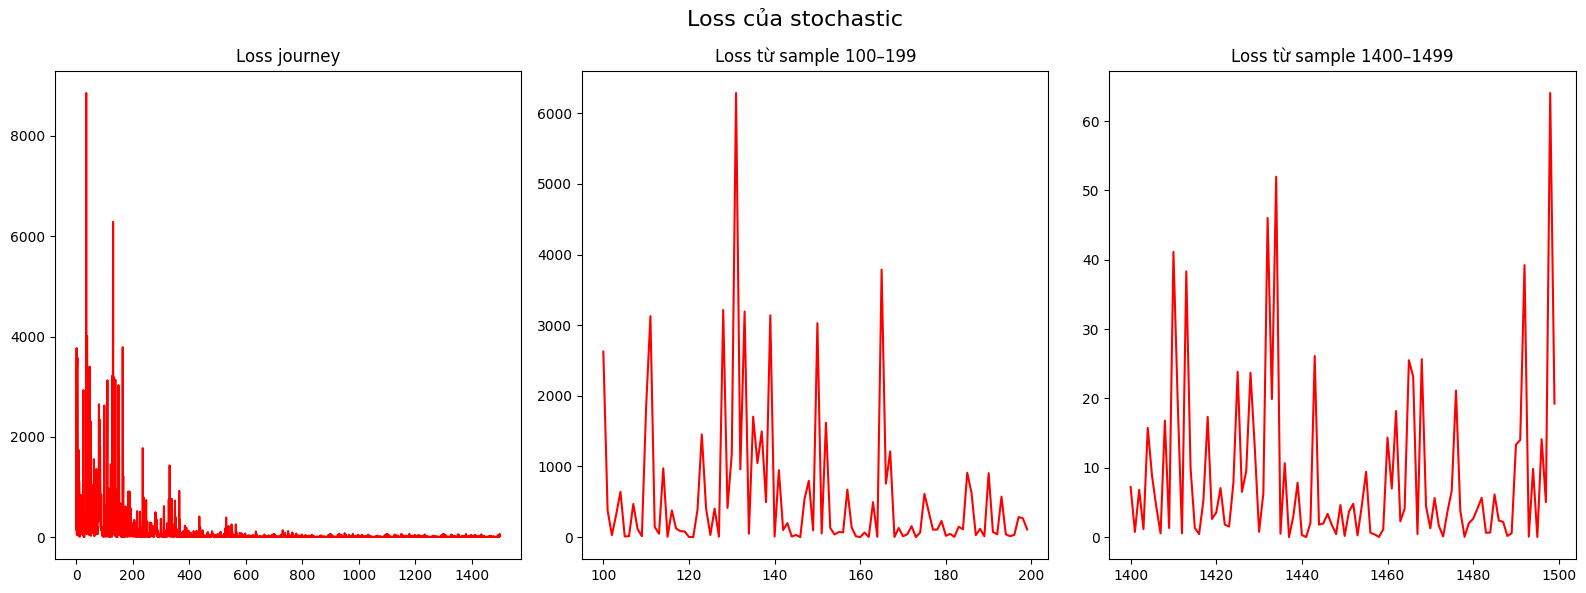

In [ ]:
import matplotlib.pyplot as plt


print("Thời gian chạy của thuật toán: ", t2-t1)
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle("Loss của stochastic", fontsize=16)

x_axis1 = list(range(1500))
axes[0].plot(x_axis1, losses[:1500], color="r")
axes[0].set_title("Loss journey")

x_axis1 = list(range(100, 200))
axes[1].plot(x_axis1, losses[100:200], color="r")
axes[1].set_title("Loss từ sample 100–199")


x_axis2 = list(range(1400, 1500))
axes[2].plot(x_axis2, losses[1400:1500], color="r")
axes[2].set_title("Loss từ sample 1400–1499")


plt.tight_layout()
plt.show()

## 2. Mini-batch 50

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("Advertising.csv")
data = data.to_numpy()
X = data[:, 0:3]
Y = data[:, 3]

N = 200
X = np.hstack([X, np.ones((N, 1))])


epochs = 500
lr = 0.000001
m = 50
losses = []
t1 = time.time()
thetas = np.random.randn(4,).T
for epoch in range(epochs):
    for i in range(0, N, m):
        x = X[i:i + m, :]
        y = Y[i:i + m]
        y_hat = x.dot(thetas)
        loss = (y_hat - y)**2
        losses.append(np.mean((loss)))
        gradients = 2 * x.T.dot(y_hat - y) / m
        thetas -= lr * gradients

t2 = time.time()
print("Final thetas:", thetas)




Final thetas: [ 0.0747572  -0.05904074  0.1125738   1.07448318]


Thời gian chạy của thuật toán:  0.13879013061523438


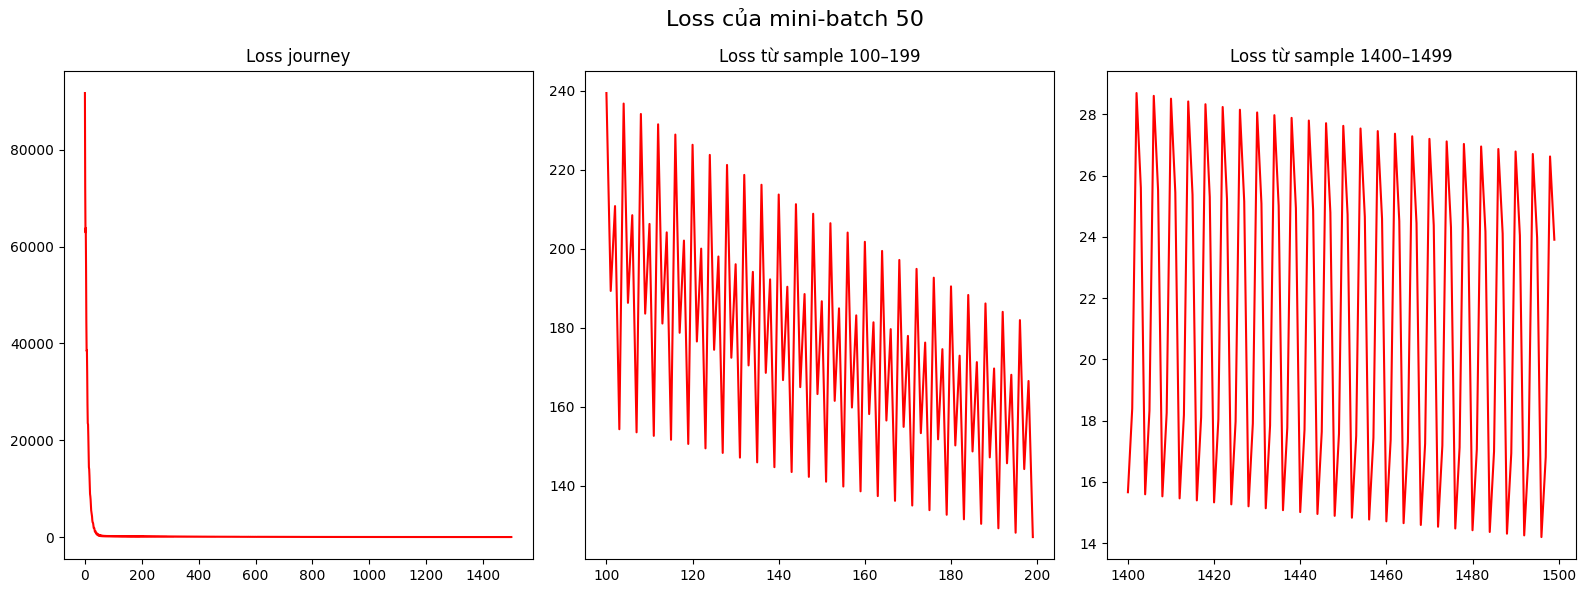

In [ ]:
import matplotlib.pyplot as plt


print("Thời gian chạy của thuật toán: ", t2-t1)
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle("Loss của mini-batch 50", fontsize=16)

x_axis1 = list(range(1500))
axes[0].plot(x_axis1, losses[:1500], color="r")
axes[0].set_title("Loss journey")

x_axis1 = list(range(100, 200))
axes[1].plot(x_axis1, losses[100:200], color="r")
axes[1].set_title("Loss từ sample 100–199")


x_axis2 = list(range(1400, 1500))
axes[2].plot(x_axis2, losses[1400:1500], color="r")
axes[2].set_title("Loss từ sample 1400–1499")


plt.tight_layout()
plt.show()